In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from models.CNN_model import CNN
from models.CNN_SE_model import CNN_SE

In [2]:
MODEL_CNN_PATH = "saved-models/cnn.pt"
MODEL_CNN_SE_PATH = "saved-models/cnn-se.pt"

In [6]:
def view_kernels(kernels: torch.Tensor, output_file_name: str):
    print(kernels.size())

    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()

    imgs = torchvision.utils.make_grid(kernels)
    imgs = imgs.cpu()

    plt.figure()
    plt.imshow(imgs.permute(1,2,0))
    plt.savefig(output_file_name)

torch.Size([16, 3, 3, 3])
torch.Size([32, 16, 3, 3])


TypeError: Invalid shape (22, 42, 16) for image data

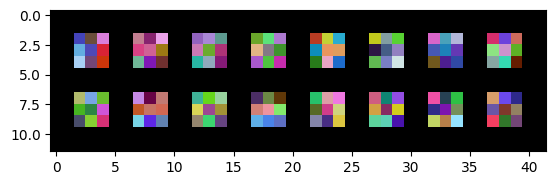

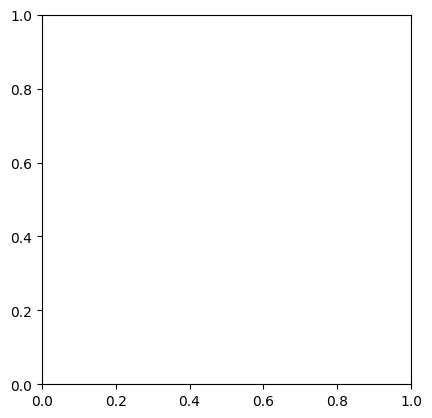

In [7]:
model: CNN = torch.load(MODEL_CNN_PATH)
view_kernels(model.conv1.weight.detach().clone(), "CNN-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone(), "CNN-layer2-kernel.png")
view_kernels(model.conv3.weight.detach().clone(), "CNN-layer3-kernel.png")


In [ ]:
model: CNN_SE = CNN_SE()
model.load_state_dict(torch.load(MODEL_CNN_SE_PATH))

view_kernels(model.conv1.weight.detach().clone(), "CNNSE-layer1-kernel.png")
view_kernels(model.conv2.weight.detach().clone(), "CNNSE-layer2-kernel.png")
view_kernels(model.conv3.weight.detach().clone(), "CNNSE-layer3-kernel.png")